# Data Analysis Project
## Analyzing Insurance Auto Claims

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [27]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [28]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis 



### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

**Question**:Are there any regional patterns in customer lifetime value?


**Answer**: Yes, there are regional patterns in customer lifetime value.The heat map shows that the customer lifetime value is higher for the rural residence type in the states of Arizona, California, and Nevada. The customer lifetime value is higher for the urban residence type in the states of Oregon and Washington.

## Supporting Analysis

In [29]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'customer_state'. You can override using
the `.groups` argument.


customer_state,residence_type,avg_customer_lifetime_value
<fct>,<fct>,<dbl>
Nevada,Rural,1244.1028
Oregon,Suburban,1154.8091
Arizona,Suburban,1106.9000
Oregon,Rural,1038.5776
California,Suburban,1003.3631
Washington,Suburban,972.7768
California,Rural,927.7725
Arizona,Rural,924.6699
Nevada,Suburban,923.9280


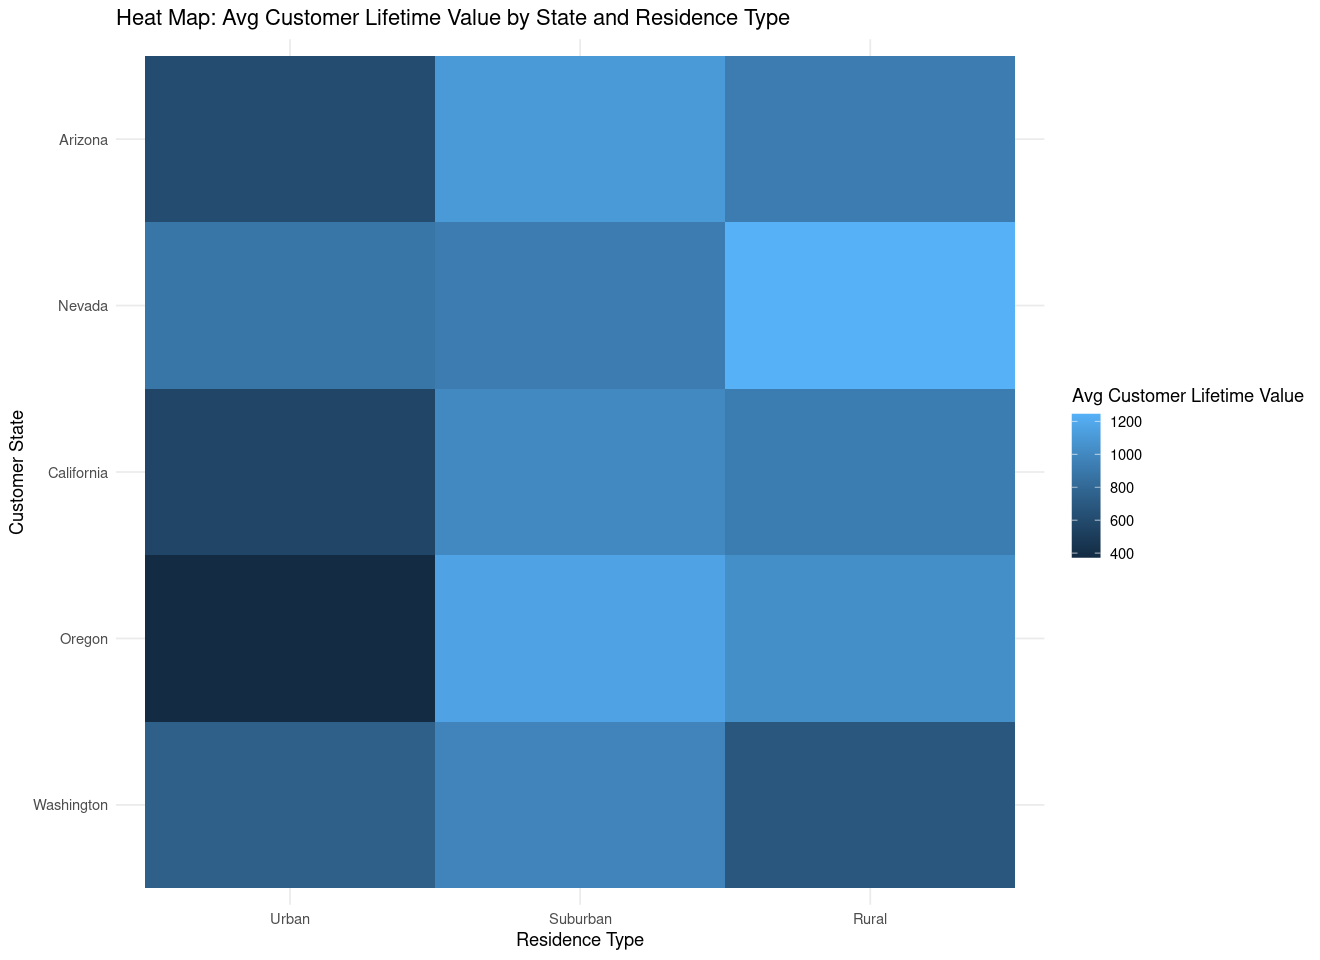

In [30]:
library(dplyr)
A1<-claims_df %>%
  group_by(customer_state,residence_type) %>%
  summarise(avg_customer_lifetime_value = mean(customer_lifetime_value)) %>%
  arrange(desc(avg_customer_lifetime_value))
View(A1)
	 
p1<-ggplot(A1, aes(x = residence_type, y = customer_state, fill = avg_customer_lifetime_value)) +
  geom_tile() +
  labs(title = "Heat Map: Avg Customer Lifetime Value by State and Residence Type",
       x = "Residence Type",
       y = "Customer State",
       fill = "Avg Customer Lifetime Value") +
  theme_minimal() 
p1

## Question 2


**Question**:What is the average claim amount based on employment status?



**Answer**:The average claim amount is highest for employed people and lowest for retired people. The average claim amount is higher for disabled people compared to unemployed people.


## Supporting Analysis


employment_status,avg_claim_amount
<fct>,<dbl>
Employed,2779.858
Medical Leave,2617.748
Retired,2557.730
Disabled,2555.860


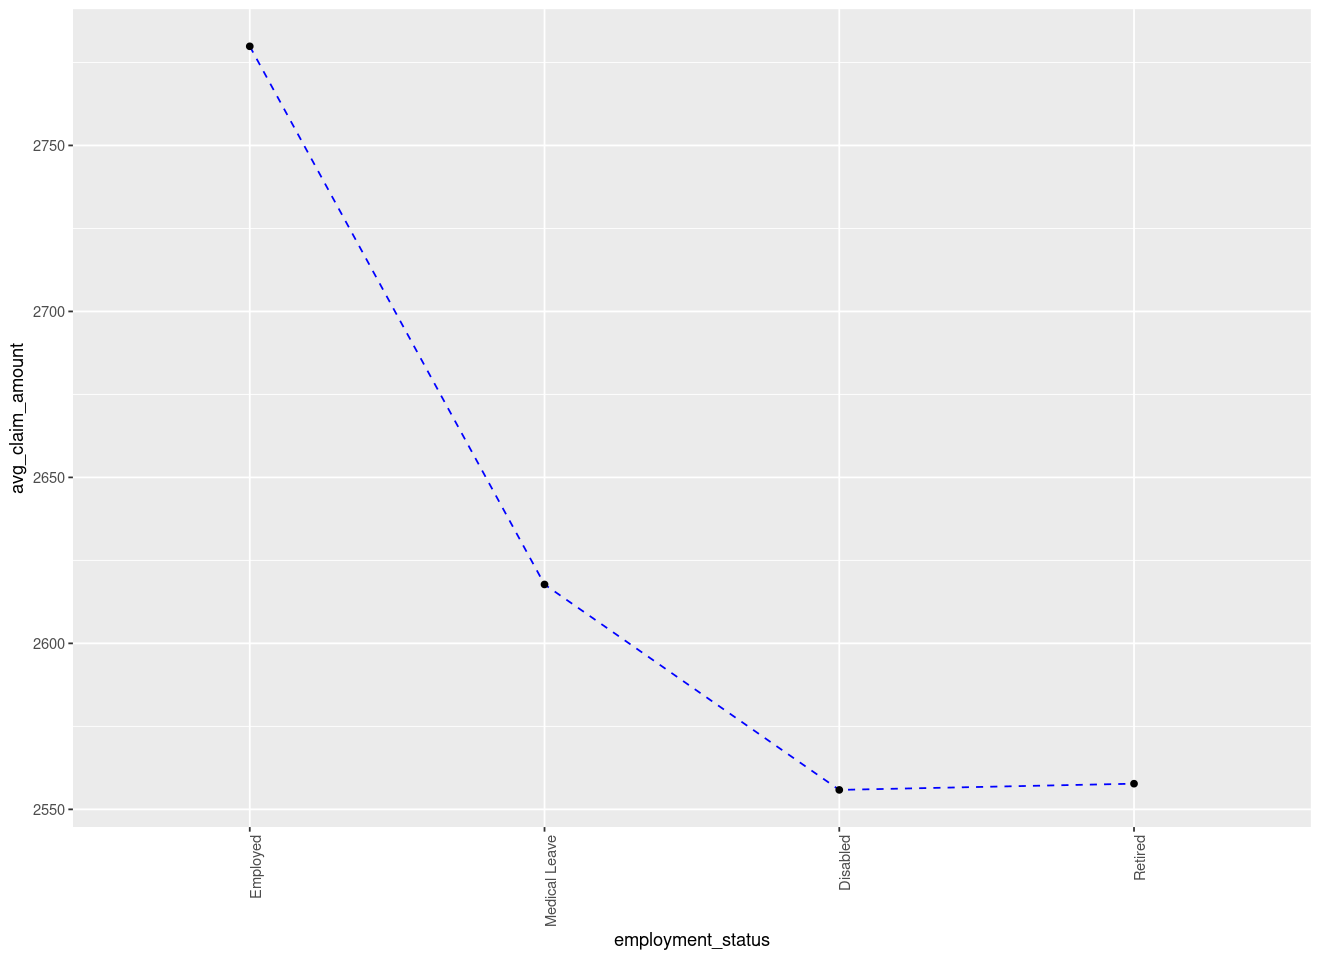

In [31]:
A2<-claims_df %>%
  group_by(employment_status) %>%
  summarise(avg_claim_amount = mean(total_claims_amount)) %>%
  arrange(desc(avg_claim_amount))
View(A2)

p2<-ggplot(A2, aes(x = employment_status, y = avg_claim_amount,group=1)) +geom_line(linetype = "dashed", color = "blue")+
  geom_point(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5)) + scale_fill_brewer(palette = "Set2")
p2

## Question 3


**Question**:does monthly premium differ by  vehicle size and gender?



**Answer**:The monthly premium differ by vehicle size and gender. As per plot,monthly premium is higher for the large vehicle size compared to the small and medium vehicle size. The monthly premium is higher in the case of male compared to female for all vehicle sizes.


## Supporting Analysis


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'vehicle_size', 'gender'. You can override
using the `.groups` argument.


vehicle_size,gender,monthly_premium
<fct>,<fct>,<dbl>
Small,Female,73
Small,Female,228
Small,Female,90
Small,Female,68
Small,Female,114
Small,Female,68
Small,Female,95
Small,Female,74
Small,Female,76


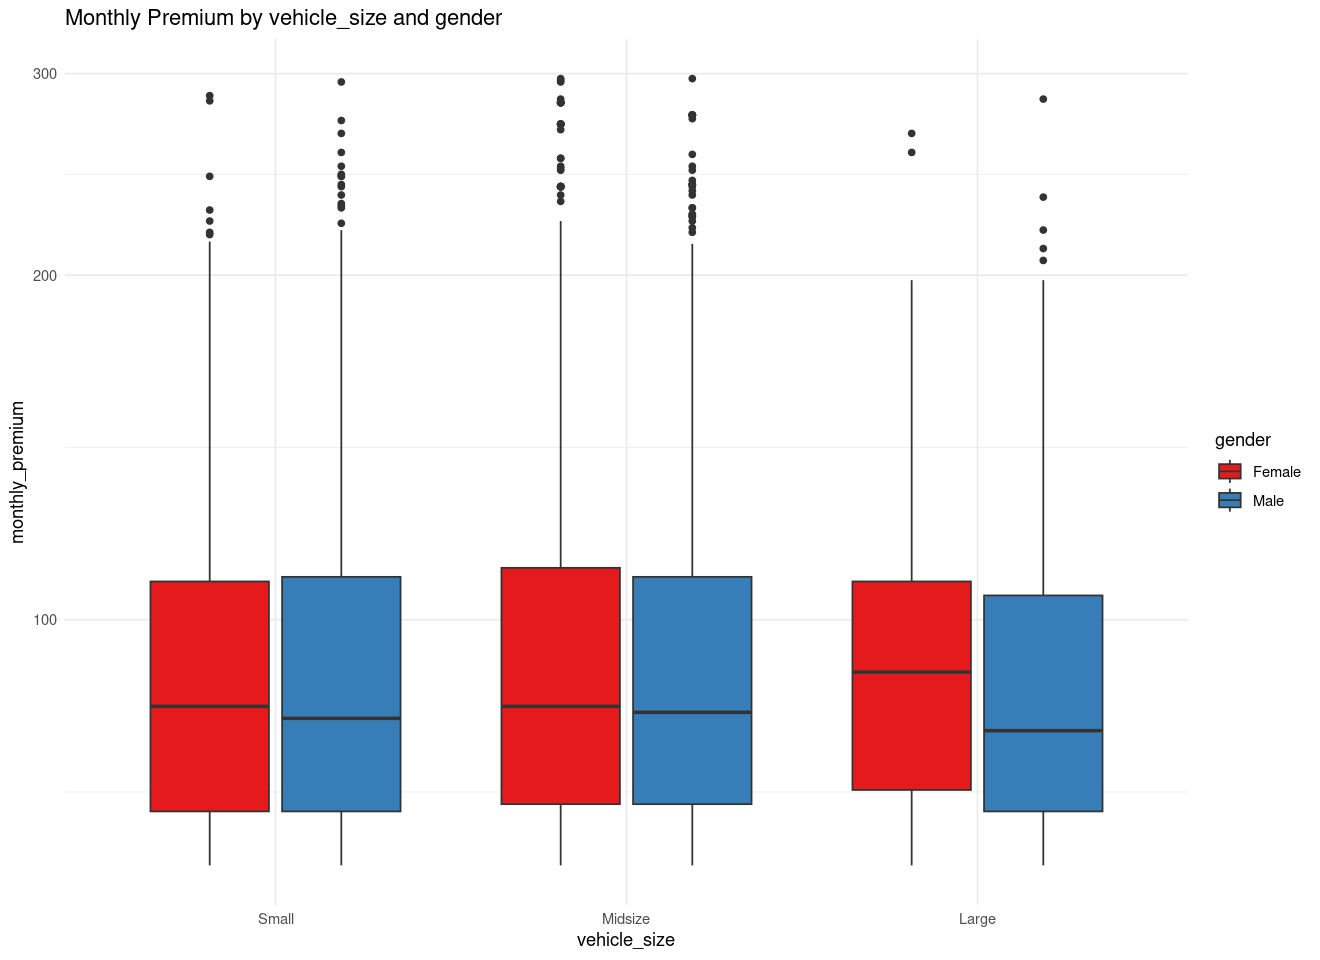

In [32]:
A3<-claims_df %>%
  group_by(vehicle_size,gender) %>%
  summarise(monthly_premium)
View(A3)
p3<-ggplot(A3, aes(x = vehicle_size, y = monthly_premium, fill=gender)) +
  geom_boxplot() +
  labs(title = "Monthly Premium by vehicle_size and gender")+theme_minimal() + scale_fill_brewer(palette = "Set1")+ scale_y_log10()
p3

## Question 4


**Question**:Which sales channel is the most profitable?



**Answer**:The pie chart shows that the most profitable sales channel is Agent, followed by Branch, Call Center, and Web. The Agent sales channel has the highest total claims amount, followed by the Branch, Call Center, and Web sales channels.


## Supporting Analysis


sales_channel,total_claims_amount
<fct>,<dbl>
Agent,6455594
Branch,4876431
Call Center,3356158
Web,2464454


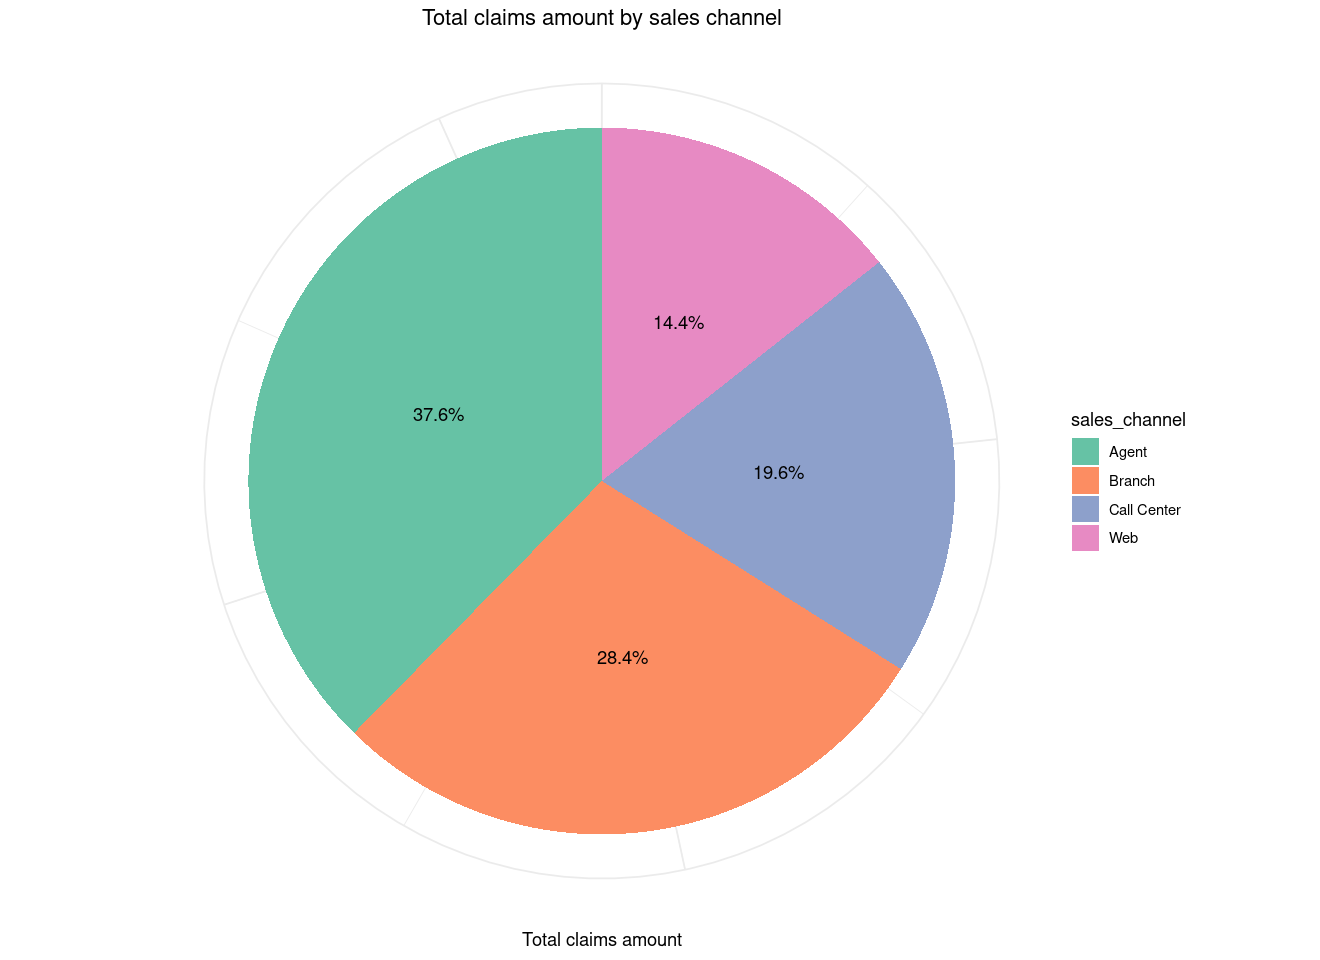

In [33]:
A4<-claims_df %>%
  group_by(sales_channel) %>%
  summarise(total_claims_amount = sum(total_claims_amount)) %>%
  arrange(desc(total_claims_amount))
View(A4)
p4<-ggplot(A4, aes(x = "", y = total_claims_amount, fill = sales_channel)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Total claims amount by sales channel", x = "", y = "Total claims amount") +
  theme_minimal() +
  theme(axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5)) +
  scale_fill_brewer(palette = "Set2")+geom_text(aes(label = scales::percent(total_claims_amount/sum(total_claims_amount))), position = position_stack(vjust = 0.5))
p4

## Question 5


**Question**:how does the density of customer lifetime value differ by policy type?



**Answer**:The density of customer lifetime value differ by policy type.The density plot shows that the customer lifetime value is higher for the personal auto policy compared to the special auto and corporate auto policy. The density of customer lifetime value is higher for the personal auto policy compared to the special auto and corporate auto policy.



## Supporting Analysis


policy,avg_customer_lifetime_value
<fct>,<dbl>
Corporate,951.3238
Personal,923.6647
Special,745.9582


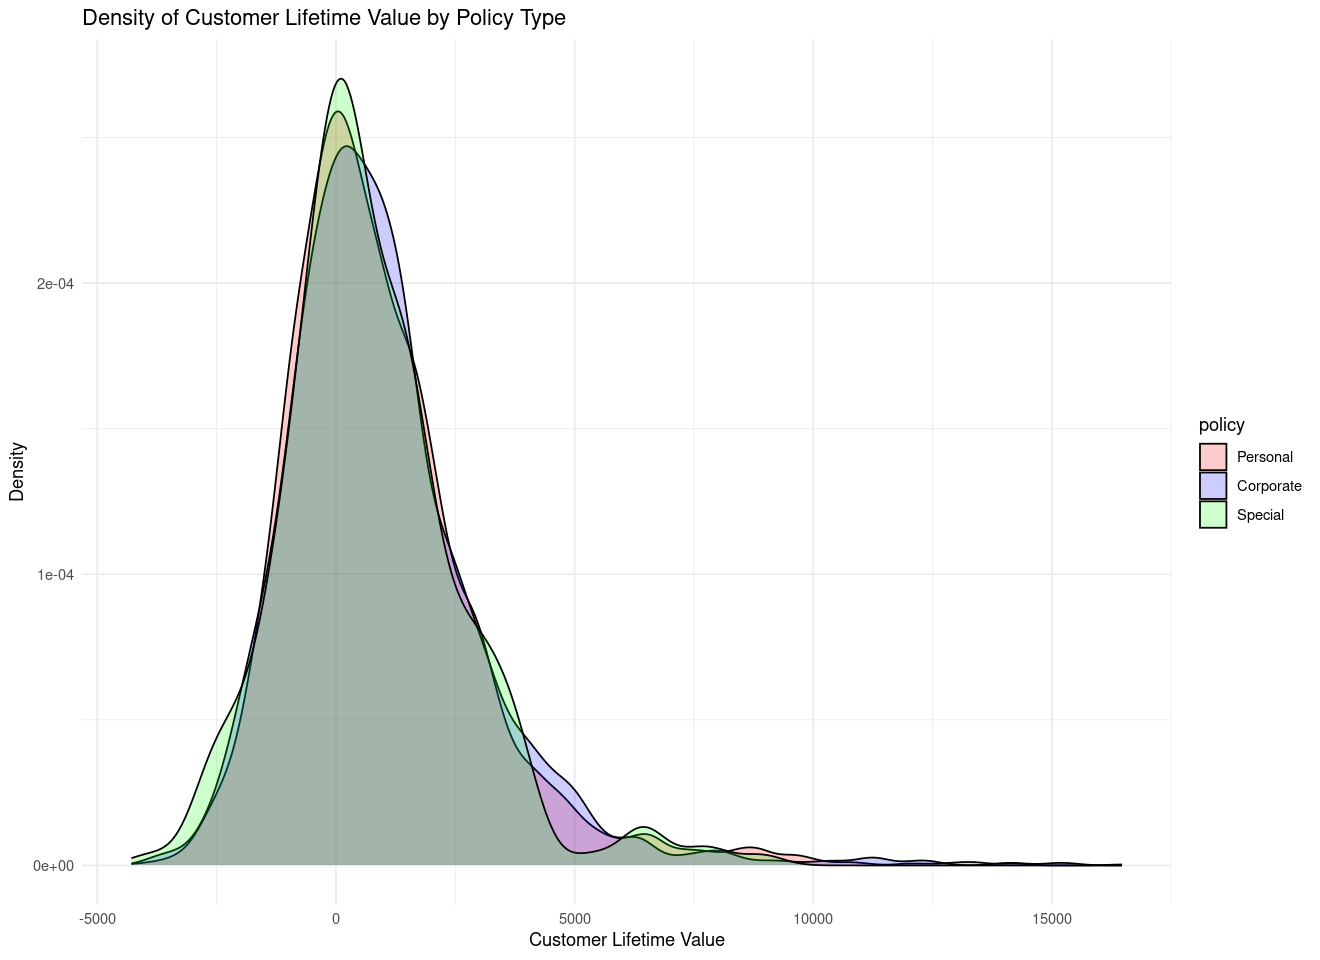

In [34]:
A5<-claims_df %>%
  group_by(policy) %>%
  summarise(avg_customer_lifetime_value = mean(customer_lifetime_value)) %>%
  arrange(desc(avg_customer_lifetime_value))
View(A5)
p5<-ggplot(claims_df, aes(x = customer_lifetime_value, fill = policy)) +
  geom_density(alpha = 0.2) +
  labs(title = "Density of Customer Lifetime Value by Policy Type", x = "Customer Lifetime Value", y = "Density") +
  theme_minimal() +
  scale_fill_manual(values = c("red", "blue", "green"))
p5

## Question 6


**Question**:
How does the employment and income influence the type of policy ?


**Answer**: The employment and income influence the type of policy.The average income is higher for the employed people compared to the other employment status. The average income is higher for the personal auto policy compared to the special auto and corporate auto policy for all employment status.


## Supporting Analysis


`summarise()` has grouped output by 'employment_status'. You can override using
the `.groups` argument.


employment_status,policy,average
<fct>,<fct>,<dbl>
Employed,Special,57610.29
Employed,Personal,55783.22
Employed,Corporate,55667.58
Retired,Corporate,20760.11
Disabled,Special,20718.35
Retired,Personal,20553.78
Disabled,Corporate,20451.86
Medical Leave,Personal,20334.54
Medical Leave,Corporate,20191.52


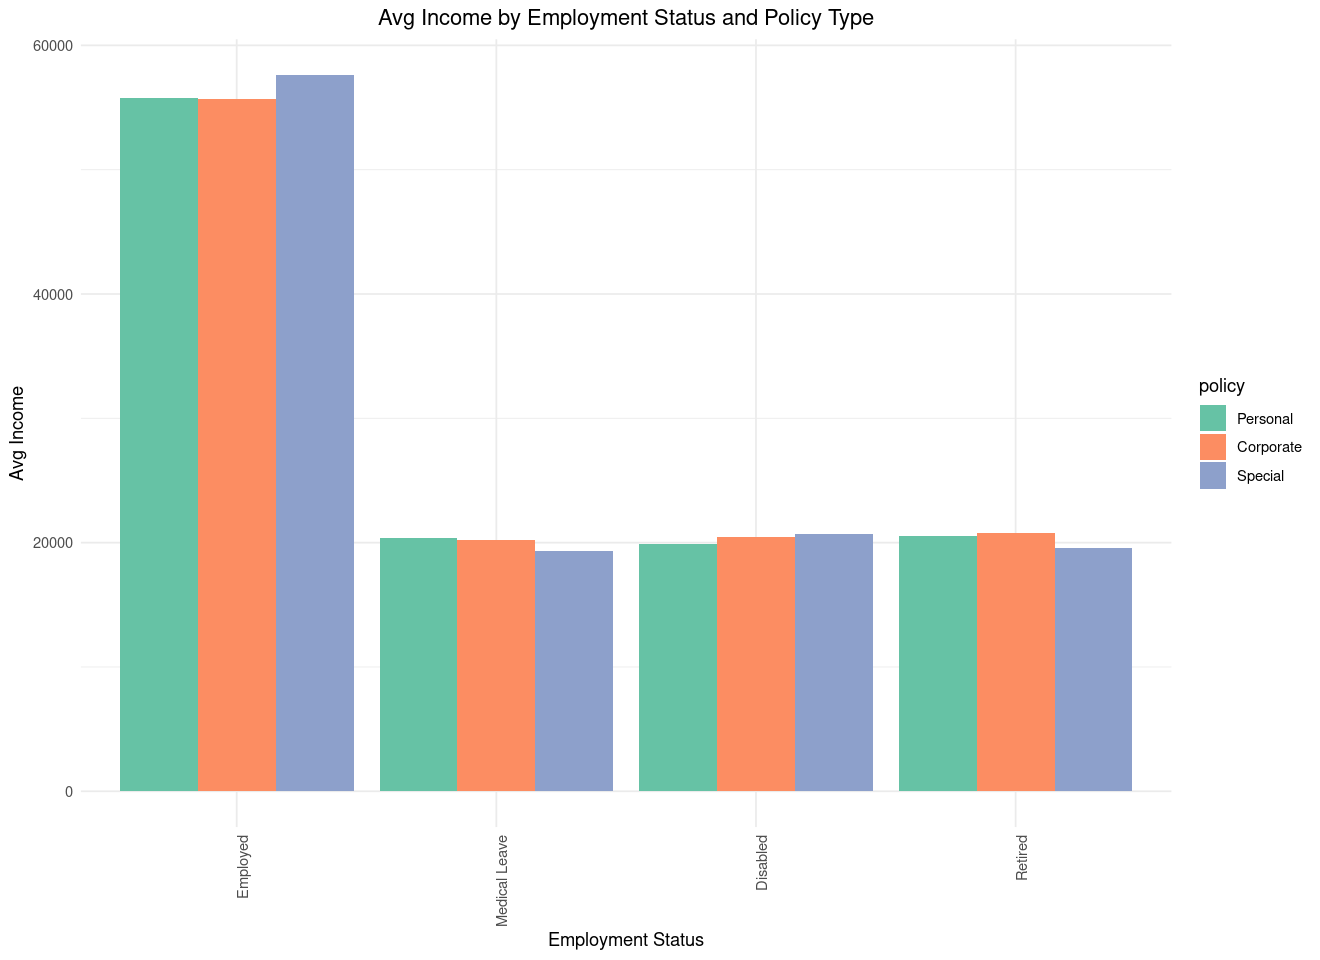

In [35]:
A6<-claims_df %>%
  group_by(employment_status,policy) %>%
  summarise(average=mean(income)) %>%
  arrange(desc(average))
View(A6)
p6<-ggplot(A6, aes(x = employment_status, y = average, fill = policy)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Avg Income by Employment Status and Policy Type", x = "Employment Status", y = "Avg Income") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5)) +
  scale_fill_brewer(palette = "Set2")
p6

## Question 7


**Question**:
Does the monthly premium change by vehicle class and sales channel?


**Answer**:The monthly premium changes by vehicle class and sales channel.The monthly premium is higher for the luxury suv vehicle class compared to the other vehicle classes. The monthly premium is higher for the branch sales channel compared to the other sales channels for all vehicle classes.


## Supporting Analysis


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'vehicle_class', 'sales_channel'. You can
override using the `.groups` argument.


vehicle_class,sales_channel,monthly_premium
<fct>,<fct>,<dbl>
Two-Door Car,Agent,81
Two-Door Car,Agent,70
Two-Door Car,Agent,72
Two-Door Car,Agent,61
Two-Door Car,Agent,90
Two-Door Car,Agent,66
Two-Door Car,Agent,66
Two-Door Car,Agent,98
Two-Door Car,Agent,108


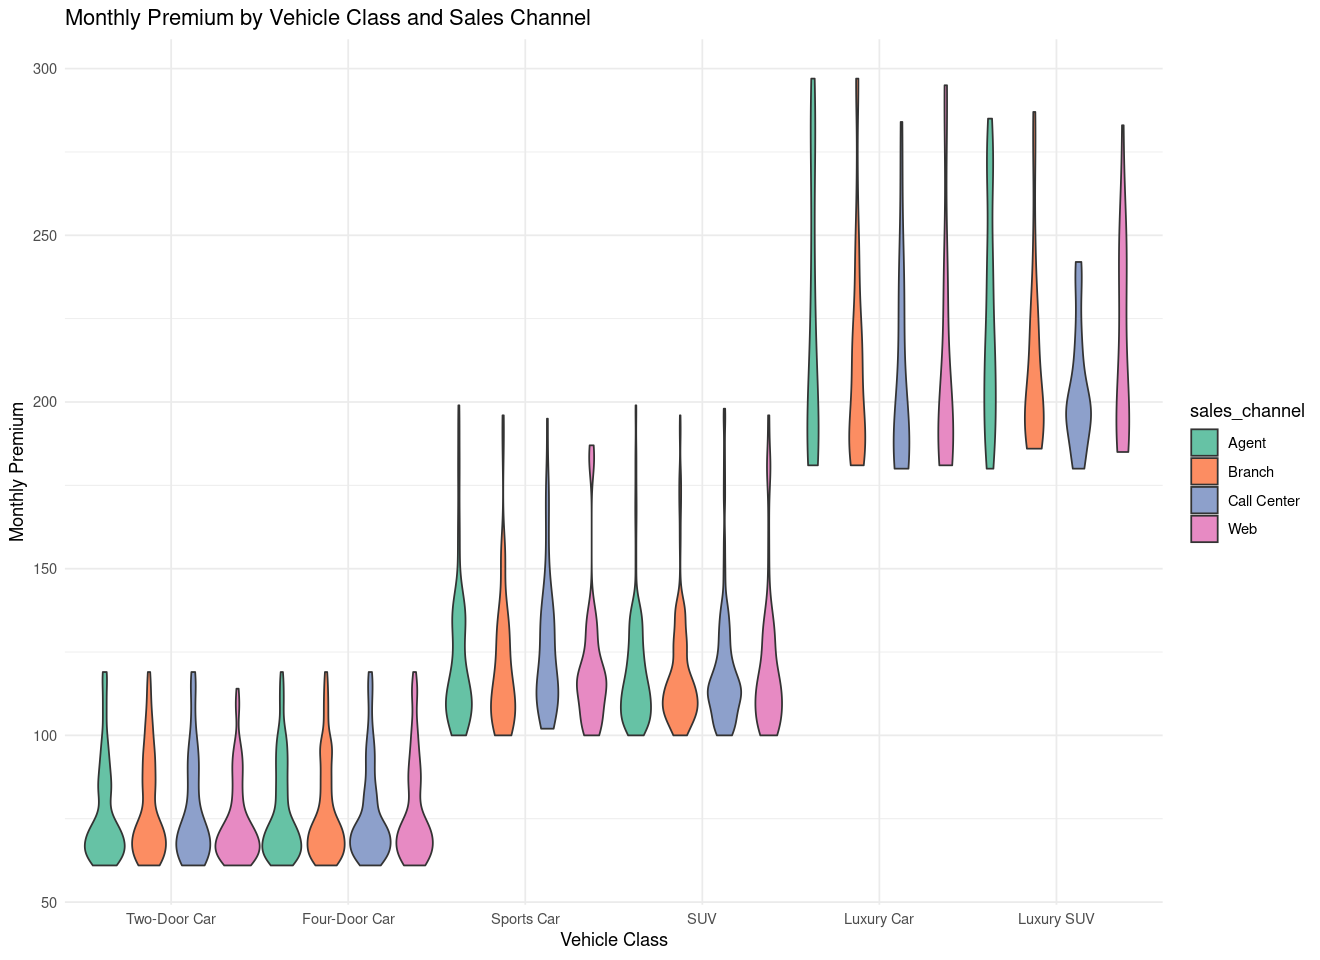

In [36]:
A7<-claims_df %>%
  group_by(vehicle_class,sales_channel) %>%
  summarise(monthly_premium)
View(A7)
p7<-ggplot(A7, aes(x = vehicle_class, y = monthly_premium, fill = sales_channel,width=1)) +
  geom_violin() +
  labs(title = "Monthly Premium by Vehicle Class and Sales Channel", x = "Vehicle Class", y = "Monthly Premium") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")
p7

## Question 8


**Question**:
does the vehicle class and vehicle size correlate with the current claim amount and the total claims amount?


**Answer**: The vehicle class and vehicle size correlate with the current claim amount and the total claims amount.The current claim amount and the total claims amount are higher for the luxury suv vehicle class compared to the other vehicle classes. The current claim amount and the total claims amount are higher for the large vehicle size compared to the other vehicle sizes for all vehicle classes.


## Supporting Analysis


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.


vehicle_class,vehicle_size,current_claim_amount_avg,total_claims_amount_avg
<fct>,<fct>,<dbl>,<dbl>
Luxury Car,Small,1762.567,2704.833
Luxury Car,Large,1670.538,3057.538
Four-Door Car,Large,1649.729,2743.041
Two-Door Car,Midsize,1646.540,2775.492
Four-Door Car,Midsize,1644.570,2773.249
Luxury SUV,Small,1630.414,2611.241
SUV,Small,1628.640,2774.164
Sports Car,Small,1620.942,2647.731
Sports Car,Midsize,1616.890,2750.142


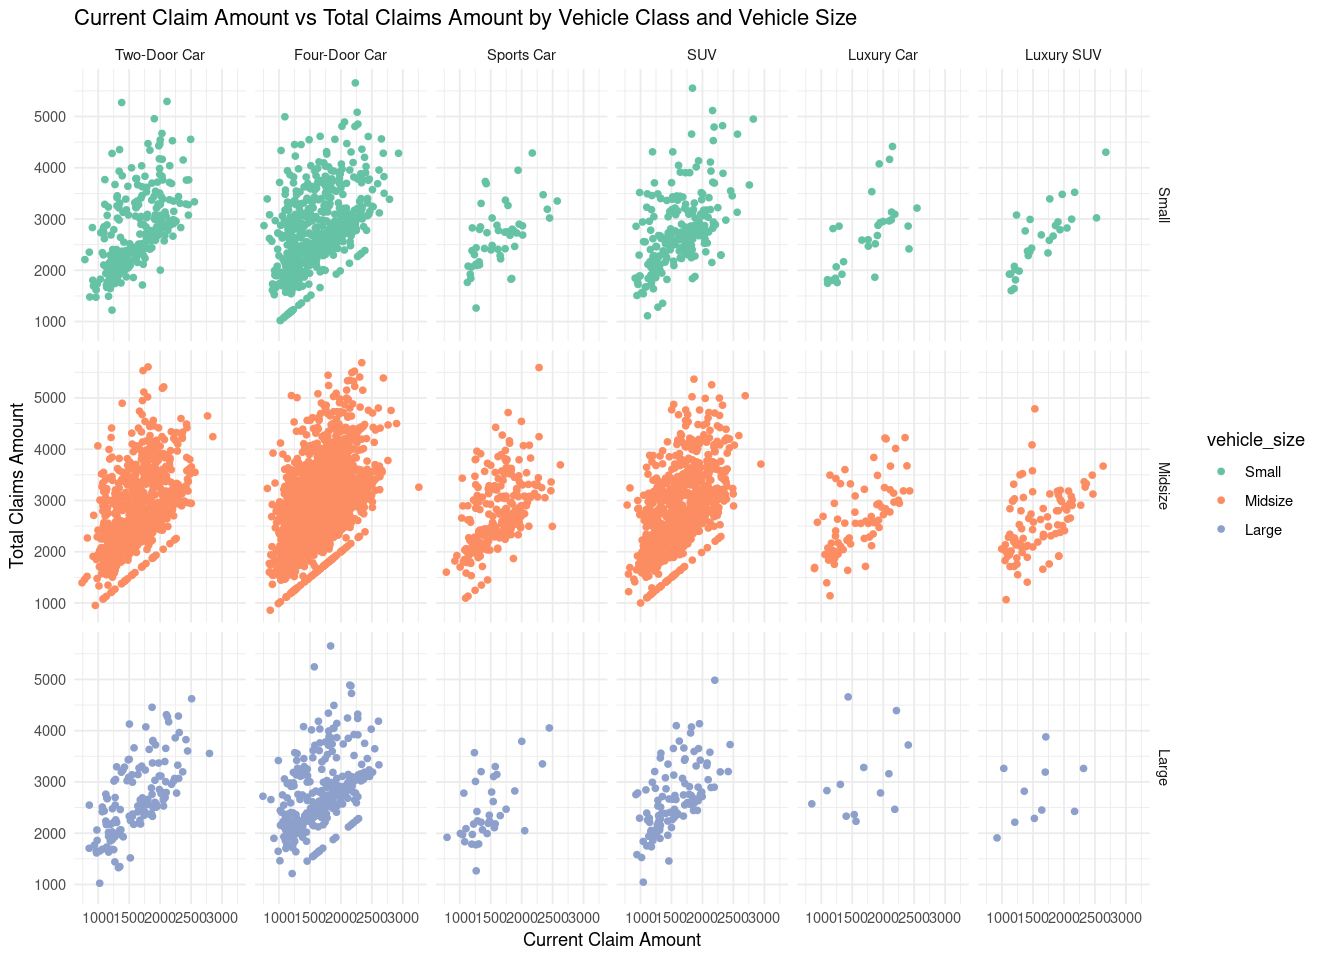

In [37]:
A8<-claims_df %>%
  group_by(vehicle_class,vehicle_size) %>%
  summarise(current_claim_amount_avg = mean(current_claim_amount),total_claims_amount_avg = mean(total_claims_amount)) %>%
  arrange(desc(current_claim_amount_avg))
View(A8)
p8<-ggplot(claims_df, aes(x = current_claim_amount, y = total_claims_amount, color = vehicle_size)) +
  geom_point() +
  facet_grid(cols=vars(claims_df$vehicle_class),rows=vars(claims_df$vehicle_size)) +
  labs(title = "Current Claim Amount vs Total Claims Amount by Vehicle Class and Vehicle Size", x = "Current Claim Amount", y = "Total Claims Amount") +
  theme_minimal() +
  scale_color_brewer(palette = "Set2")
p8

# Executive Summary 



## Introduction
The company is focused on addressing several pivotal challenges crucial for its future prosperity. Firstly, it aims to analyze the correlation between customer lifetime value and policy type to inform strategic decisions adapted to different policy categories. Secondly, understanding how employment status and income align with policy types aids in discerning customer demographics and preferences. Thirdly, insights into the interplay among vehicle class, size, and claim amounts enhance risk assessment and claims management. Moreover, comprehending how vehicle attributes impact monthly premiums enables more precise pricing strategies. Lastly, investigating the influence of vehicle size and class on premiums provides valuable insights into customer preferences and pricing dynamics. Addressing these challenges equips the company to make informed decisions, optimizing operations and fostering future growth and success.


## Key Findings

The analysis reveals several key insights: firstly, personal auto policies tend to have higher customer lifetime value compared to special auto and corporate auto policies, guiding decision-making on policy types. Secondly, employed individuals generally boast higher average incomes, particularly within the personal auto policy segment, highlighting the importance of income and employment status in customer profiling. Thirdly, luxury SUVs and large vehicle sizes tend to incur higher current and total claims amounts, emphasizing the need for vigilant risk management across vehicle categories. Furthermore, luxury SUVs command higher monthly premiums, especially via branch sales channels, signaling pricing nuances and channel strategies critical for premium optimization. These findings underscore the significance of understanding customer demographics, risk factors, and pricing dynamics across policy types, vehicle classes, and sizes, facilitating informed decisions and strategic adjustments for sustained success.

## Recommendations

The analysis presents several strategic recommendations for the company to consider. Firstly, it's advised to prioritize the personal auto policy, given its higher customer lifetime value compared to special auto and corporate auto policies. Secondly, targeting employed individuals is recommended, as they tend to have higher average incomes across all policy types. Thirdly, focusing on the luxury SUV vehicle class and large vehicle sizes is suggested due to their higher current and total claims amounts, calling for more careful risk management. Moreover, directing attention to the luxury SUV class and the branch sales channel is proposed, given their higher monthly premiums. These recommendations, backed by data analysis, indicate the potential for increased customer lifetime value, income, current claim amounts, total claims amounts, and monthly premiums by aligning with these segments. Implementing these suggestions would enable the company to tap into lucrative opportunities, fostering growth and profitability in the process.